In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("embedded_system_network_security_dataset.csv")
df.head()
df.info()
df.isnull().sum()
features = df[[
    'packet_size',
    'inter_arrival_time',
    'packet_count_5s',
    'mean_packet_size',
    'spectral_entropy',
    'frequency_band_energy'
]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   packet_size            1000 non-null   float64
 1   inter_arrival_time     1000 non-null   float64
 2   src_port               1000 non-null   int64  
 3   dst_port               1000 non-null   int64  
 4   packet_count_5s        1000 non-null   float64
 5   mean_packet_size       1000 non-null   float64
 6   spectral_entropy       1000 non-null   float64
 7   frequency_band_energy  1000 non-null   float64
 8   label                  1000 non-null   float64
 9   protocol_type_TCP      1000 non-null   bool   
 10  protocol_type_UDP      1000 non-null   bool   
 11  src_ip_192.168.1.2     1000 non-null   bool   
 12  src_ip_192.168.1.3     1000 non-null   bool   
 13  dst_ip_192.168.1.5     1000 non-null   bool   
 14  dst_ip_192.168.1.6     1000 non-null   bool   
 15  tcp_f

In [4]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
model = IsolationForest(
    n_estimators=100,
    contamination=0.01,
    max_samples=256,
    random_state=42
)

model.fit(scaled_features)

IsolationForest(contamination=0.01, max_samples=256, random_state=42)

In [5]:
anomaly_labels = model.predict(scaled_features)

features['anomaly'] = anomaly_labels
features.head()

C:\Users\Sriram reddy\AppData\Local\Temp\ipykernel_21168\1687400555.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['anomaly'] = anomaly_labels


,packet_size,inter_arrival_time,packet_count_5s,mean_packet_size,spectral_entropy,frequency_band_energy,anomaly
0,0.405154,0.620362,0.857143,0.0,0.834066,0.534891,1
1,0.527559,0.741288,0.785714,0.0,0.147196,0.990757,1
2,0.226199,0.485116,0.285714,0.0,0.855192,0.031781,1
3,0.573372,0.450965,0.142857,0.0,0.153220,0.169958,1
4,0.651396,0.888740,0.714286,0.0,0.923916,0.552053,1


In [6]:
features['anomaly'].value_counts()
plt.figure(figsize=(10,6))

normal_data = features[features['anomaly'] == 1]
anomalies = features[features['anomaly'] == -1]


<Figure size 1000x600 with 0 Axes>

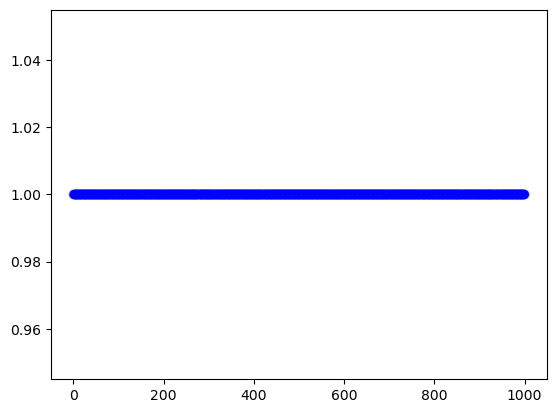

In [7]:
plt.scatter(normal_data.index, normal_data['anomaly'],color='blue', label='Normal', alpha=0.5)

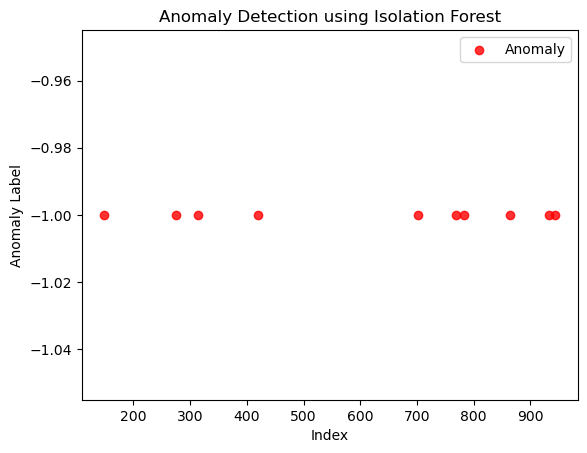

In [8]:
plt.scatter(anomalies.index, anomalies['anomaly'],color='red', label='Anomaly', alpha=0.8)

plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Index')
plt.ylabel('Anomaly Label')
plt.legend()
plt.show()

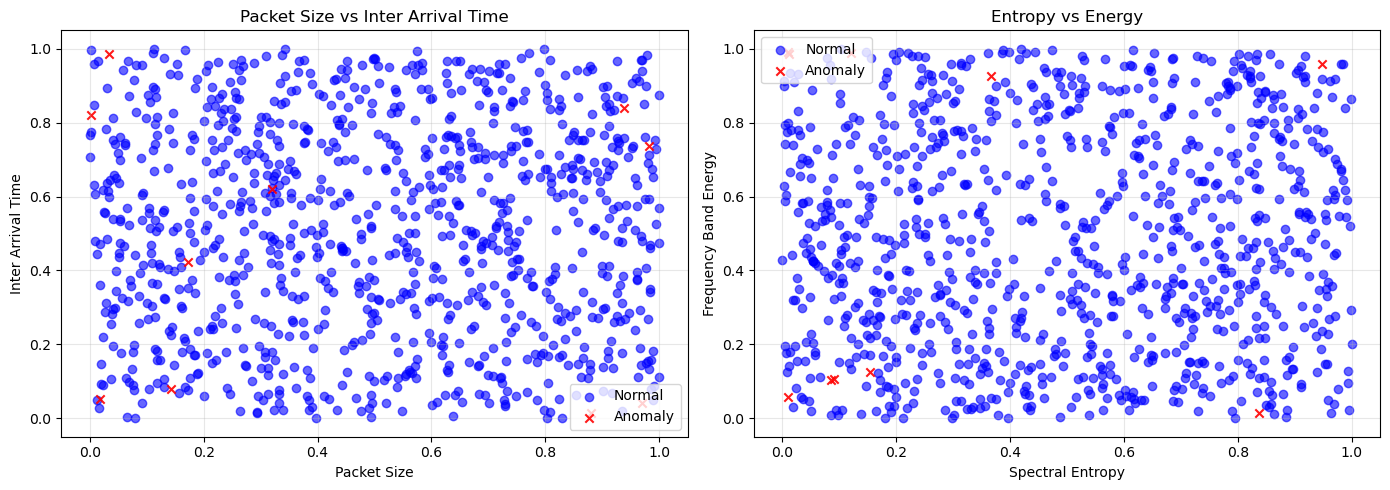

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

normal = features[features['anomaly'] == 1]
anomaly = features[features['anomaly'] == -1]

# Plot 1: Packet Size vs Inter Arrival Time
axes[0].scatter(normal['packet_size'], normal['inter_arrival_time'],color='blue', label='Normal', alpha=0.6)
axes[0].scatter(anomaly['packet_size'], anomaly['inter_arrival_time'],color='red', label='Anomaly', alpha=0.9, marker='x')
axes[0].set_xlabel('Packet Size')
axes[0].set_ylabel('Inter Arrival Time')
axes[0].set_title('Packet Size vs Inter Arrival Time')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Spectral Entropy vs Frequency Band Energy
axes[1].scatter(normal['spectral_entropy'], normal['frequency_band_energy'],color='blue', label='Normal', alpha=0.6)
axes[1].scatter(anomaly['spectral_entropy'], anomaly['frequency_band_energy'],color='red', label='Anomaly', alpha=0.9, marker='x')
axes[1].set_xlabel('Spectral Entropy')
axes[1].set_ylabel('Frequency Band Energy')
axes[1].set_title('Entropy vs Energy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [10]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=normal['packet_size'],
    y=normal['inter_arrival_time'],
    z=normal['spectral_entropy'],
    mode='markers',
    name='Normal',
    marker=dict(
        size=5,
        color=normal['frequency_band_energy'],
        colorscale='Blues',
        opacity=0.6,
        colorbar=dict(title='Energy')
    )
))

fig.add_trace(go.Scatter3d(
    x=anomaly['packet_size'],
    y=anomaly['inter_arrival_time'],
    z=anomaly['spectral_entropy'],
    mode='markers',
    name='Anomaly',
    marker=dict(
        size=7,
        color=anomaly['frequency_band_energy'],
        colorscale='Reds',
        opacity=0.9,
        symbol='diamond'
    )
))

fig.update_layout(
    title='4D Scatter Plot (Color = Energy)',
    scene=dict(
        xaxis_title='Packet Size',
        yaxis_title='Inter Arrival Time',
        zaxis_title='Spectral Entropy'
    ),
    width=900,
    height=700
)

fig.show()